<a href="https://colab.research.google.com/github/Liza-IITP/Linear-Logistic/blob/main/SPAM_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import pandas as pd

In [102]:
df =  pd.read_csv('/content/spam.csv', encoding='latin-1') # Uses latin-1 encoding to avoid issues with special characters

In [103]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4125,spam,"SPJanuary Male Sale! Hot Gay chat now cheaper,...",NaN,NaN,NaN
1345,ham,Que pases un buen tiempo or something like that,NaN,NaN,NaN
4732,ham,Good Morning my Dear Shijutta........... Have ...,NaN,NaN,NaN
3608,ham,Joy's father is John. Then John is the ____ of...,NaN,NaN,NaN
2053,ham,Oh... I was thkin of goin yogasana at 10 den n...,NaN,NaN,NaN


In [104]:
df.shape

(5572, 5)

In [105]:
# DATA CLEANING
# EDA
# TEXT PREPROCESSING
# MODEL BUILDING
# EVALUATION
# IMPROVEMENT
# WEBSITE
# DEPLOY

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# **DATA CLEANING** 🧹

In [107]:
# removing the null columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [108]:
# rename columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
994,ham,"I can't, I don't have her number!"
2410,ham,Ok... Thanx... Gd nite 2 Ì_ too...
3646,ham,"Hey babe, my friend had to cancel, still up fo..."
5212,ham,K.k.how is your business now?
2784,ham,"K, wat s tht incident?"


In [109]:
# Encoding the target to be 0 and 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [110]:
# null values check
df.isnull().sum()

,0
target,0
text,0


In [111]:
# check for duplicate values
print(df.duplicated().sum())
df = df.drop_duplicates(keep='first')


403


In [112]:
print(df.duplicated().sum())

0


In [113]:
df.shape

(5169, 2)

# **EDA** 📅

In [114]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [115]:
df['target'].value_counts()

,count
target,
0,4516
1,653


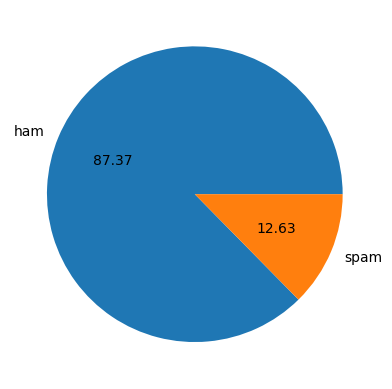

In [116]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [117]:
# the dataset is imbalanced
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [118]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [119]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [120]:
df['num_sentences'] =df['text'].apply(lambda x:nltk.sent_tokenize(x))

In [121]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl..."
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar..."


In [122]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,5169.000000,5169.000000
mean,78.977945,18.455794
std,58.236293,13.324758
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,26.000000
max,910.000000,220.000000


In [123]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,4516.000000,4516.000000
mean,70.459256,17.123782
std,56.358207,13.493970
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


In [124]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


<Axes: xlabel='num_characters', ylabel='Count'>

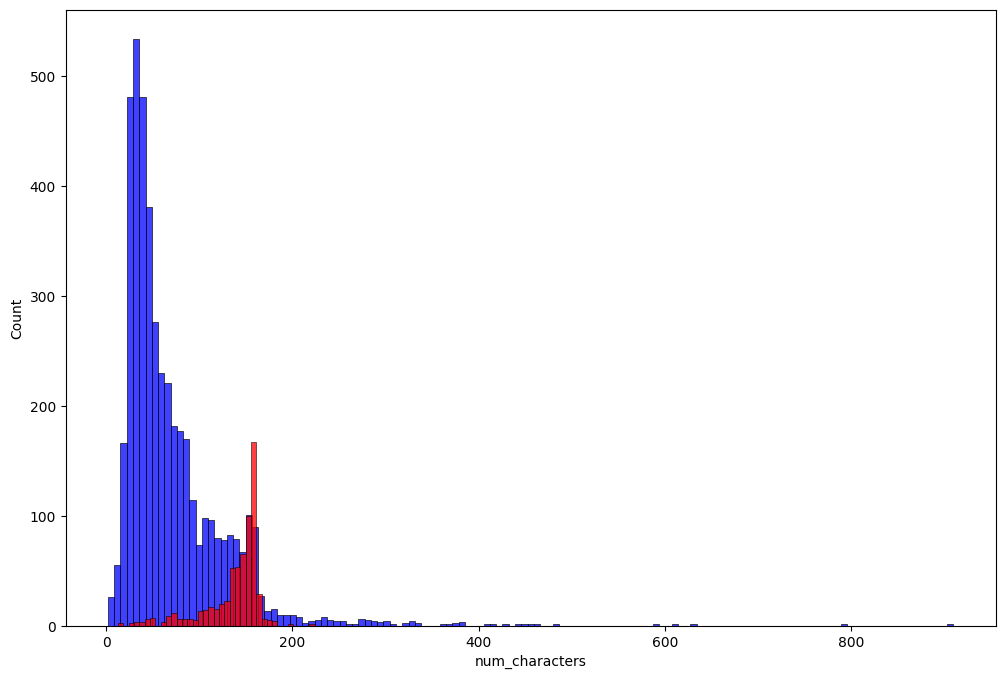

In [125]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'],color='blue')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

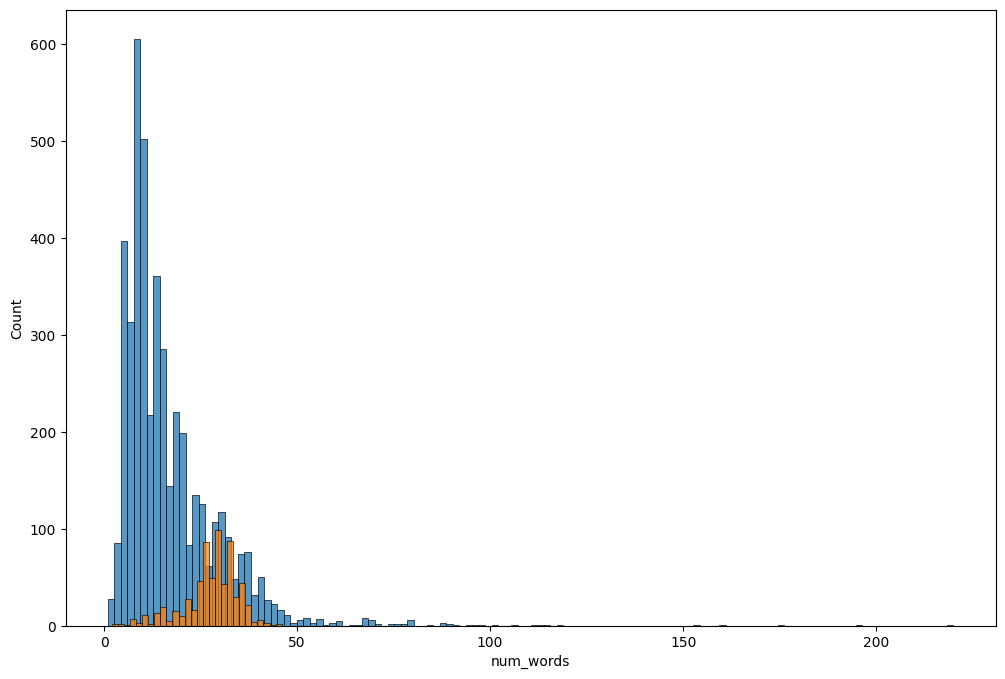

In [126]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

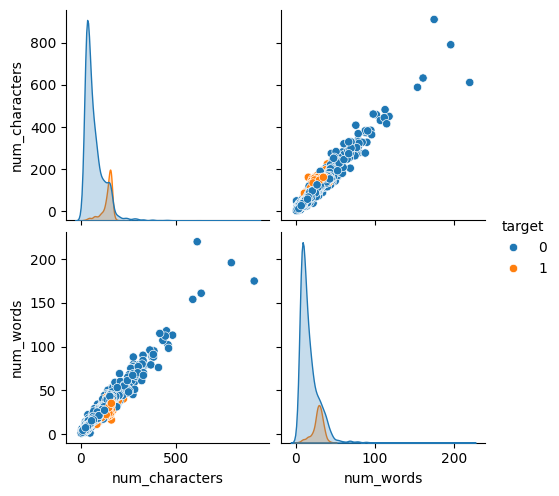

In [127]:
sns.pairplot(df,hue='target')

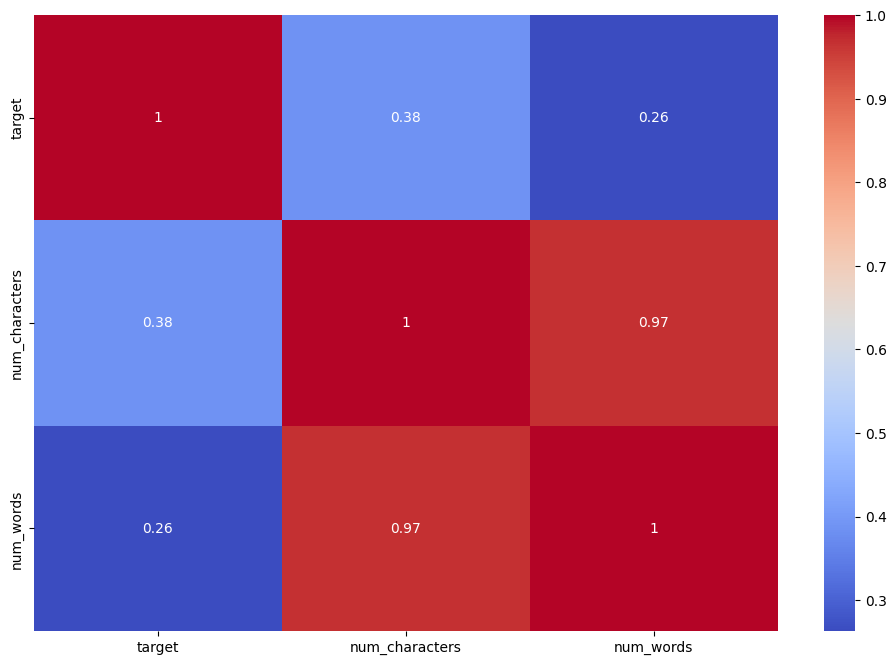

In [128]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.show()

# **Data Preprocessing**
*   Lower case
*   Tokenization
*   Removing Special Characters
*   Removing Stop Words and Punctuations
*   Stemming



In [129]:
def transform_text(text) :
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text :
    if i.isalnum() :
      y.append(i)
  text = y[:]
  y.clear()
  for i in text :
    if i not in stopwords.words('english') and i not in string.punctuation :
      y.append(i)
  text = y[:]
  y.clear()
  for i in text :
    y.append(ps.stem(i))

  return " ".join(y)


In [130]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [131]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [132]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [133]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [134]:
transform_text('Pancakes were fantastic though biryani was okayish, what about your opinions , did u like them ? ')

'pancak fantast though biryani okayish opinion u like'

In [135]:
df['transformed_text'] = df['text'].apply(transform_text)

In [136]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",nah think goe usf live around though


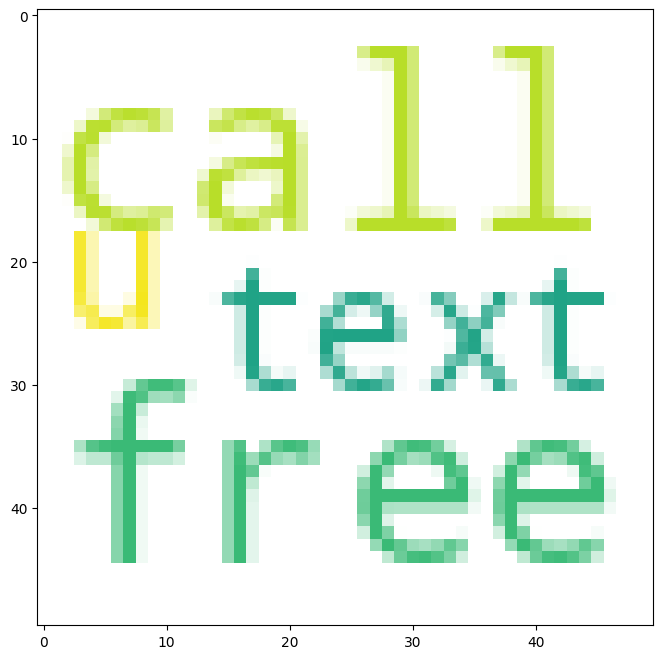

In [137]:
from wordcloud import WordCloud
wc = WordCloud(width=50,height = 50 , min_font_size=10 ,background_color ='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)


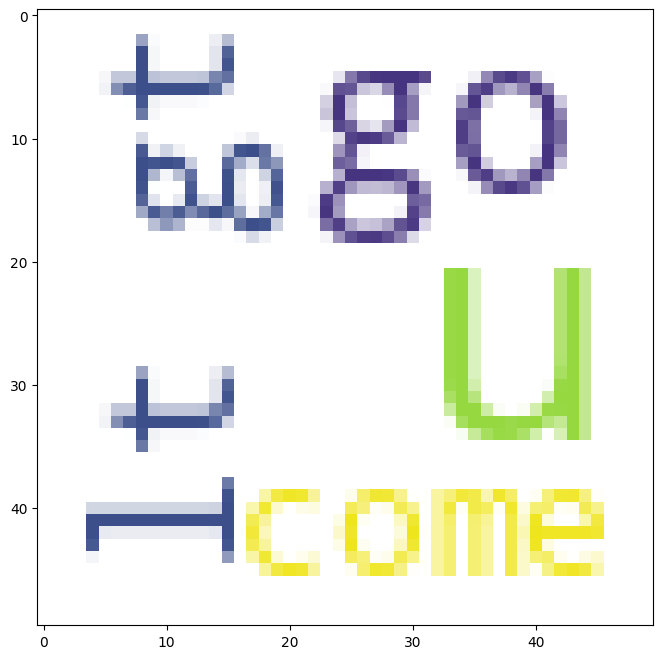

In [138]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [139]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist() :
  for words in msg.split() :
    spam_corpus.append(words)
len(spam_corpus)

9939

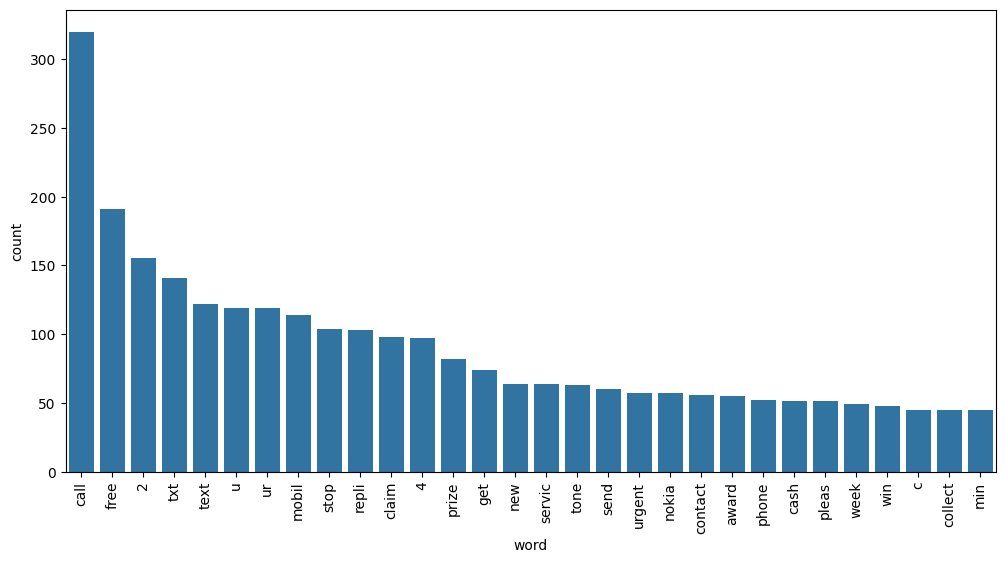

In [140]:
from collections import Counter

spam_words = Counter(spam_corpus).most_common(30)
spam_df = pd.DataFrame(spam_words, columns=['word', 'count'])

plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation=90)
plt.show()


In [141]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist() :
  for words in msg.split() :
    ham_corpus.append(words)
len(ham_corpus)

35404

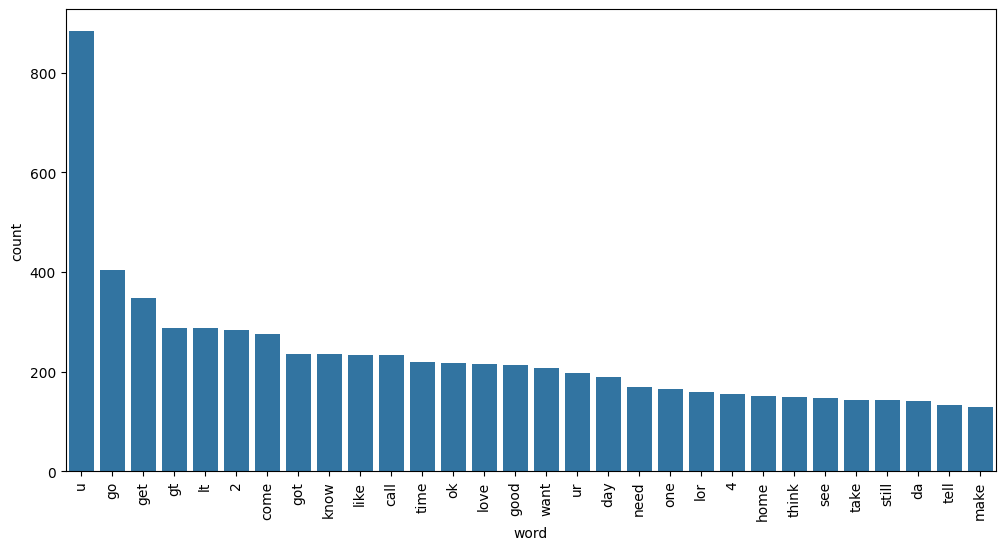

In [142]:
ham_words = Counter(ham_corpus).most_common(30)
ham_df = pd.DataFrame(ham_words, columns=['word', 'count'])

plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=ham_df)
plt.xticks(rotation=90)
plt.show()

# **MODEL BUILDING** 🏢

In [143]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [144]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [146]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [147]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[779 114]
 [ 22 119]]
0.5107296137339056


In [148]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[876  17]
 [  8 133]]
0.8866666666666667


In [149]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9671179883945842
[[892   1]
 [ 33 108]]
0.9908256880733946


In [150]:
tfidf= TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [151]:
y = df['target'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [152]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8655705996131529
[[779 114]
 [ 25 116]]
0.5043478260869565


In [153]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[893   0]
 [ 28 113]]
1.0


In [154]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9738878143133463
[[890   3]
 [ 24 117]]
0.975


In [155]:
# tfidf ---> MNB

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs ={
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

print(train_classifier(svc,X_train,y_train,X_test,y_test))
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items() :
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  print(f"{name} accuracy is {current_accuracy}")
  print(f"{name} precision is {current_precision}")
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df = performance_df.set_index('Algorithm')
performance_df.head(10)





(0.965183752417795, 0.926829268292683)
SVC accuracy is 0.965183752417795
SVC precision is 0.926829268292683
KN accuracy is 0.9003868471953579
KN precision is 0.975
NB accuracy is 0.9729206963249516
NB precision is 1.0
DT accuracy is 0.9294003868471954
DT precision is 0.8469387755102041
LR accuracy is 0.941972920696325
LR precision is 0.8857142857142857
RF accuracy is 0.9593810444874274
RF precision is 0.9900990099009901
AdaBoost accuracy is 0.9177949709864603
AdaBoost precision is 0.8333333333333334
BgC accuracy is 0.960348162475822
BgC precision is 0.9032258064516129
ETC accuracy is 0.9709864603481625
ETC precision is 0.9911504424778761
GBDT accuracy is 0.9458413926499033
GBDT precision is 0.956989247311828
xgb accuracy is 0.9632495164410058
xgb precision is 0.9401709401709402


,Accuracy,Precision
Algorithm,,
NB,0.972921,1.000000
ETC,0.970986,0.991150
RF,0.959381,0.990099
KN,0.900387,0.975000
GBDT,0.945841,0.956989
xgb,0.963250,0.940171
SVC,0.965184,0.926829
BgC,0.960348,0.903226
LR,0.941973,0.885714


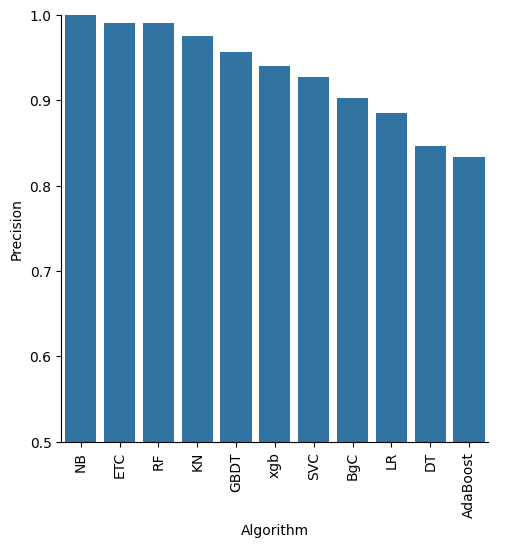

In [157]:
sns.catplot(x='Algorithm',y='Precision',data=performance_df,kind='bar')
plt.ylim(0.5,1.0)
plt.xticks(rotation=90)
plt.show()

In [158]:
# model improve
# Change the max_features of Tfldf
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
})

# sort by accuracy in descending order
temp_df = temp_df.sort_values(by='Accuracy_max_ft_3000', ascending=False)

print(temp_df)


   Algorithm  Accuracy_max_ft_3000  Precision_max_ft_3000
2         NB              0.972921               1.000000
8        ETC              0.970986               0.991150
0        SVC              0.965184               0.926829
10       xgb              0.963250               0.940171
7        BgC              0.960348               0.903226
5         RF              0.959381               0.990099
9       GBDT              0.945841               0.956989
4         LR              0.941973               0.885714
3         DT              0.929400               0.846939
6   AdaBoost              0.917795               0.833333
1         KN              0.900387               0.975000


In [159]:
# Applying scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = df['target'].values

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=101)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs ={
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

print(train_classifier(svc,X_train,y_train,X_test,y_test))
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items() :
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  print(f"{name} accuracy is {current_accuracy}")
  print(f"{name} precision is {current_precision}")
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df = performance_df.set_index('Algorithm')
performance_df.head(10)





(0.9584139264990329, 0.8828125)
SVC accuracy is 0.9584139264990329
SVC precision is 0.8828125
KN accuracy is 0.8965183752417795
KN precision is 1.0
NB accuracy is 0.9806576402321083
NB precision is 0.9763779527559056
DT accuracy is 0.9303675048355899
DT precision is 0.8349514563106796
LR accuracy is 0.9506769825918762
LR precision is 0.9090909090909091
RF accuracy is 0.9593810444874274
RF precision is 0.9900990099009901
AdaBoost accuracy is 0.9177949709864603
AdaBoost precision is 0.8333333333333334
BgC accuracy is 0.960348162475822
BgC precision is 0.9032258064516129
ETC accuracy is 0.9709864603481625
ETC precision is 0.9911504424778761
GBDT accuracy is 0.9458413926499033
GBDT precision is 0.956989247311828
xgb accuracy is 0.9632495164410058
xgb precision is 0.9401709401709402


,Accuracy,Precision
Algorithm,,
KN,0.896518,1.000000
ETC,0.970986,0.991150
RF,0.959381,0.990099
NB,0.980658,0.976378
GBDT,0.945841,0.956989
xgb,0.963250,0.940171
LR,0.950677,0.909091
BgC,0.960348,0.903226
SVC,0.958414,0.882812


In [160]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report


svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('dt', dtc), ('lr', lrc)], voting='soft')
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       893
           1       0.97      0.80      0.88       141

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [161]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [162]:
!pip install streamlit
import streamlit as st
tfidf = pickle.load(open('/content/vectorizer.pkl','rb'))
model = pickle.load(open('/content/model.pkl','rb'))